# Describe qualitatively how the current flows through the system

![pic1](pics/task1.png)

At t=0 there is no voltage drop accros the capacitor and so it acts like a shorted circuit, all the current flowing through it. As time goes on there is more and more charge stored up, allowing less and less current to flow through the capacitor and more through the resistor. After a very long time when the capacitor is practically full, all the current is flowing through the resistor. This is assuming Vs is constant.

# Choose a pulse

In [44]:
#a sinusoidal wave
import numpy as np


def Vpulse(t, t0, V0):
    return V0*np.sin(2*np.pi*t/t0)


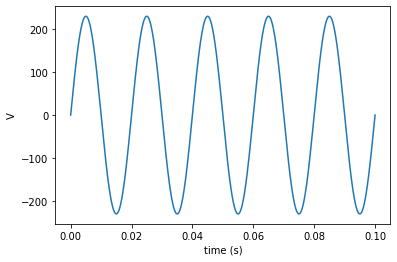

In [2]:
#plot the wave
import matplotlib.pyplot as pl

t = np.linspace(0, 0.1, 1000)
t0 = 1/50 # 50 Hz
Vs = Vpulse(t, t0, 230.0)

pl.plot(t, Vs)
pl.xlabel("time (s)")
pl.ylabel("V")
pl.show()

The wave can represent a signal from a wall socket.

# Study the propagation of the pulse

![os](pics/origsys.png)

Vpulse(t) is the chosen sinusoidal wave. The code bellow uses the numerical version of the cable equation to simulate the wave's propagation through n elements pictured above. I will call them elements.

In [42]:
# Initialize physical variables
# from oppgaveteksten
C = 1e-10
R = 1e11
r = 1e6
V0 = 100e-3

# Set up simulation system
t0 = 1/50

resolution = 1000
dt = t0 / resolution
time = 0.1

# Set up arrays for t and V[j,i]
n = int(time / dt)

# a chain of 100 elements simulated for 10 waves
nrElem = 100
V = np.zeros((n, nrElem), float)
t = np.zeros((n, 1), float)


# Simulation loops : find V[j,i] for j = 1,2,3,..


# all elements are shorted at t=0
# because the current flows freely through the capacitors
# so their V is left being 0

# the first one is the voltage source unaffected by others
V[0, 0] = Vpulse(0, t0, V0)

for j in range(n - 1):

    # time += dt
    t[j + 1] = t[j] + dt

    # left-most element where the signal starts
    V[j + 1, 0] = Vpulse(t[j + 1], t0, V0)

    # all the others except the last
    for i in range(1, nrElem - 1):
        V[j + 1, i] = V[j, i] + dt * (
            (V[j, i + 1] - 2 * V[j, i] + V[j, i - 1]) / (r * C) - V[j, i] / (R * C)
        )

    # last element
    i = nrElem - 1
    V[j + 1, i] = V[j, i] + dt * ((V[j, i - 1] - V[j, i]) / (r * C) - V[j, i] / (R * C))



Here I study how the voltage changes over time for elements close to the source, in the middle and at the end of the chain.

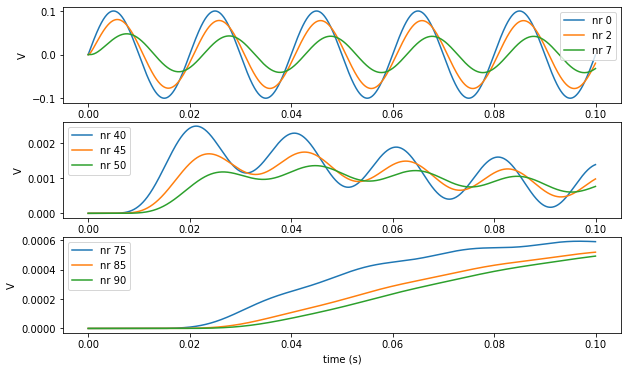

In [43]:
#close to the source

pl.figure(figsize=(10, 6))

pl.subplot(311)
for j in [0, 2, 7]:
    pl.plot(t, V[:, j], label=f"nr {j}")
pl.legend(); pl.ylabel("V"); pl.xlabel("time (s)");

#middle
pl.subplot(312)
for j in [40, 45, 50]:
    pl.plot(t, V[:, j], label=f"nr {j}")
pl.legend(); pl.ylabel("V"); pl.xlabel("time (s)");

#end
pl.subplot(313)
for j in [75, 85, 90]:
    pl.plot(t, V[:, j], label=f"nr {j}")
pl.legend(); pl.ylabel("V"); pl.xlabel("time (s)");


pl.show()

I can see the the farther away we get from the source the lower the voltage over the element. The ones close to the source seem stable and predictable. And the closer we get to the source the more like the source the voltage gets. They dont seem to decay over time. If we look at nr 7 there is a delay in when it peaks, but the number of peaks is the same. And the farther away we move the greater the delay.

Now those in the middle are visibly decaying over time. Again, with the voltage getting lower and delay greater the farther away the element is. But the absolute decay is bigger for nr 40 than it is for nr 50. And it appears the voltage never gets negative unlike the original signal.

And as we move to the end of the chain the voltage is flatter and flatter and the voltage on nr 85 and 90 is still rising. Still increasing the (average) charge in their capacitors. Nr 75 is at its peak, and if it follows the pattern it will start to decay. At the end there it is coming down from a local peak, because of the wave, but that doesnt really tell us anything about the trend farther in time. Looking at number 90 it is hard to tell that the original voltage source is a sinusoidal wave.

# Modify the model

In this project we modify the cable equation of a cell membrane to include the effect of a voltage-gated resistor instead of a regular one.

![ts4](pics/Task4sys.png)

This changes $I_x$ in the original expression we used to find the next element Vj+1.

![ts4i](pics/task4i.png)

For N=1 immediately after the signal turns on the current flows through the capacitor as before with no resitance and R(v) is infinite(no current). After a short while when there is enough charge in the capacitor and the voltage exceeds 20mV, R(v) becomes just plain R and current starts flowing through it as well and the system acts in the same way as it did before. When the signal switches direction (sinusoidal pulse) the capacitor will get discharged at one point and the voltage will drop bellow 20mV. And so it will loop.

Code to simulate the propagation is the same as before with minor adjustments.

In [64]:
# Initialize physical variables
# from oppgaveteksten
C = 1e-10
R = 1e11
r = 1e6
V0 = 100e-3

# Set up simulation system
t0 = 1/50

resolution = 1000
dt = t0 / resolution
time = 0.1

# Set up arrays for t and V[j,i]
n = int(time / dt)

# a chain of 100 elements simulated for 10 waves
nrElem = 100
V = np.zeros((n, nrElem), float)
t = np.zeros((n, 1), float)


# Simulation loops : find V[j,i] for j = 1,2,3,..


# all elements are shorted at t=0
# because the current flows freely through the capacitors
# so their V is left being 0

# the first one is the voltage source unaffected by others
V[0, 0] = Vpulse(0, t0, V0)

for j in range(n - 1):

    # time += dt
    t[j + 1] = t[j] + dt

    # left-most element where the signal starts
    V[j + 1, 0] = Vpulse(t[j + 1], t0, V0)
    

    # all the others except the last
    for i in range(1, nrElem - 1):
        #the change
        Ixi = (V[j, i] / R) if (V[j, i] >= 20e-3) else 0
        
        V[j + 1, i] = V[j, i] + dt * (
            (V[j, i + 1] - 2 * V[j, i] + V[j, i - 1]) / (r * C) - Ixi/C
        )

    # last element
    i = nrElem - 1
    Ixi = (V[j, i] / R) if (V[j, i] >= 20e-3) else 0
    V[j + 1, i] = V[j, i] + dt * ((V[j, i - 1] - V[j, i]) / (r * C) - Ixi/C)

Lets do the same plots as before so we can compare.

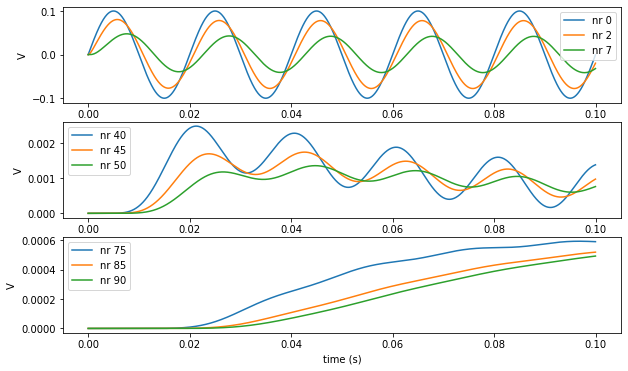

In [63]:
pl.figure(figsize=(10, 6))

pl.subplot(311)
for j in [0, 2, 7]:
    pl.plot(t, V[:, j], label=f"nr {j}")
pl.legend(); pl.ylabel("V"); pl.xlabel("time (s)");

#middle
pl.subplot(312)
for j in [40, 45, 50]:
    pl.plot(t, V[:, j], label=f"nr {j}")
pl.legend(); pl.ylabel("V"); pl.xlabel("time (s)");

#end
pl.subplot(313)
for j in [75, 85, 90]:
    pl.plot(t, V[:, j], label=f"nr {j}")
pl.legend(); pl.ylabel("V"); pl.xlabel("time (s)");


pl.show()

There is no obvious difference between the models. One would expect that current not leaking through the R but rather filling up the capacitor faster would cause some change. But no. So everything mentioned above for the original model applies here.